# Testing detection of seeded events

Load in the finding code. 

In [15]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2TranPix_test.py'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/KasenKilonovaSeed.ipynb'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/Step function test.ipynb'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/KSN2015K Injector.ipynb'
%matplotlib notebook
from tqdm import tnrange, tqdm_notebook

In [ ]:
from random import randint
pixfile = '/Volumes/TOSHIBA EXt/K2/c6/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz'
hdu = fits.open(pixfile)
dat = hdu[1].data
data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
time = dat["TIME"] + 2454833.0
Qual = hdu[1].data.field('QUALITY')

Minframe= FindMinFrame(data)

In [ ]:
valid = np.where(~np.isnan(ObjectMask(data,Minframe)))
positionx = randint(0,valid[0].shape[0])
Start = randint(0,data.shape[0])

In [2]:
funny_keywords = {'1CTYP4': 'CTYPE1',
                  '2CTYP4': 'CTYPE2',
                  '1CRPX4': 'CRPIX1',
                  '2CRPX4': 'CRPIX2',
                  '1CRVL4': 'CRVAL1',
                  '2CRVL4': 'CRVAL2',
                  '1CUNI4': 'CUNIT1',
                  '2CUNI4': 'CUNIT2',
                  '1CDLT4': 'CDELT1',
                  '2CDLT4': 'CDELT2',
                  '11PC4': 'PC1_1',
                  '12PC4': 'PC1_2',
                  '21PC4': 'PC2_1',
                  '22PC4': 'PC2_2'}
mywcs = {}
for oldkey, newkey in funny_keywords.items():
    mywcs[newkey] = hdu[1].header[oldkey]
wcs = WCS(mywcs)

In [1170]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2TranPix_test.py'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/KasenKilonovaSeed.ipynb'
%matplotlib notebook
from tqdm import tnrange, tqdm_notebook
from random import randint
save = '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/Kilonova/'
D = np.arange(1,300,10)*1e6 # distance in Mpc

pixfile = '/Volumes/TOSHIBA EXt/K2/c06/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz'
hdu = fits.open(pixfile)
dat = hdu[1].data
data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
time = dat["TIME"] + 2454833.0
Qual = hdu[1].data.field('QUALITY')


#D = [200e6]
Result = []
Fakes = []
Masked = []
starts = []
positions = []
datas = []
Detections = np.zeros((len(D),data.shape[1],data.shape[2]))
for k in tqdm_notebook(range(1)):#len(D))):
    Run = []
    Run_fakes = []
    Run_masked = []
    for i in tqdm_notebook(range(data.shape[1]),leave = False):
        for j in tqdm_notebook(range(data.shape[2]),leave = False):
        
            Position = [i,j]
            positions.append(Position)
            Start = 1000#randint(0,data.shape[0]-1)
            testdata = np.copy(data)
            testdata[Start:,Position[0],Position[1]] = testdata[Start:,Position[0],Position[1]] + K2Kilonova(-1,20,time,Start)[Start:]#+ ReKilonova
            datas.append(testdata)
            detec, falsedetec, maskeddetec = K2tranPix(testdata,time,Qual,wcs,Position,Start)
            Run.append(detec)
            Run_fakes.append(falsedetec)
            Run_masked.append(maskeddetec)
            if detec == 1:
                Detections[k,i,j] += 1
    Result.append(Run)
    Fakes.append(Run_fakes)
    Masked.append(Run_masked)
Result = np.array(Result)
Fakes = np.array(Fakes)
Masked = np.array(Masked)



HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=9), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1201]
T1
Asteroid
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1012 1087]
T1
TL1
139.537691176
21.0700283051
9.65385075174
TLF
T1
[1012 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2


HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1012 1087 1201]
T1
TL1
138.725143671
19.3591470122
8.63175471441
TLF
T1
T1
Asteroid
[1012 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1012 1087 1201]
T1
TL1
160.820636809
35.5470022559
11.388576741
TLF
T1
T1
Asteroid
[1012 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197,

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1012 1087 3651]
T1
TL1
137.141080208
19.3092414141
9.75584956474
TLF
T1
T1
Asteroid
[1012 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  687  916  940 1012 1087 1141 1170 3651]
T1
T1
T1
T1
T1
T1
TL1
163.786413856
37.0001057982
13.5732982344
TLF
T1
T1
T1
T1
Asteroid
[1012 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1011, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 24

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1012 1087 3651]
T1
TL1
138.973176397
17.9167786539
9.99212598453
TLF
T1
T1
Asteroid
[1012 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3724, 3774, 3809, 3833]
2
[ 564  636  687  916  940 1012 1087 1141 1170]
T1
T1
T1
T1
T1
T1
TL1
171.095444828
39.9904206395
13.7814643724
TLF
T1
T1
T1
[1012 1285]
Run
[78, 564, 636, 689, 725, 829, 916, 940, 1011, 1087, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1012 1087 3651]
T1
TL1
134.649371393
13.030798614
10.5213597431
TLF
T1
T1
Asteroid
[1012 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  687  916  940 1012 1087 1141 1170 3651]
T1
T1
T1
T1
T1
T1
TL1
164.549653061
31.1627171934
13.9818483673
TLF
T1
T1
T1
T1
Asteroid
[1012 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 246

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1012 1087]
T1
TL1
136.966199294
13.9287583977
10.1812668336
TLF
T1
[1012 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1012 1087]
T1
TL1
163.047871068
29.3288814425
12.8919487313
TLF
T1
[1012 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1018, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 35

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1012 1087]
T1
TL1
136.434238255
11.4395256042
10.1808739482
TLF
T1
[1012 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1018, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1018]
T1
TL1
165.016133964
22.6756335795
15.0240389162
TLF
[1018 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1018, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

Run
[78, 564, 636, 687, 725, 829, 916, 940, 1014, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1014]
T1
TL1
135.125065491
12.0940717459
9.54626770604
TLF
[1014 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1018, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1018]
T1
TL1
166.645909786
34.7058

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1018, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1018]
T1
TL1
140.852218032
13.9778635502
13.0565951749
TLF
[1018 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1018, 1087, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1018 1087]
T1
TL

In [1014]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2TranPix_test.py'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/KasenKilonovaSeed.ipynb'
%matplotlib notebook
from tqdm import tnrange, tqdm_notebook
from random import randint
save = '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/Kilonova/'
D = np.arange(1,110,10)*1e6 # distance in Mpc

pixfile = '/Volumes/TOSHIBA EXt/K2/c6/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz'
hdu = fits.open(pixfile)
dat = hdu[1].data
data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
time = dat["TIME"] + 2454833.0
Qual = hdu[1].data.field('QUALITY')


D = [60e6]
Result = []
Fakes = []
Masked = []
starts = []
positions = []
datas = []
for distance in tqdm_notebook(D):
    Run = []
    Run_fakes = []
    Run_masked = []
    Kilonova, Kilotime = K2Kilonova(3,distance)
    Kilonova = Kilonova[0,Kilotime > 0]
    for i in tqdm_notebook(range(1000),leave = False):
        
        xposition = randint(0,data.shape[1]-1)
        yposition = randint(0,data.shape[2]-1)
        Position = [xposition,yposition]
        positions.append(Position)
        Start = randint(0,data.shape[0]-1)
        starts.append(Start)
        if Kilonova.shape[0] > data[Start:].shape[0]:
            ReKilonova = Kilonova[:data[Start:].shape[0]]
        else:
            temp = np.zeros(data[Start:].shape[0])
            temp[:Kilonova.shape[0]] = Kilonova
            ReKilonova = temp
        testdata = np.copy(data)
        testdata[Start:,Position[0],Position[1]] = testdata[Start:,Position[0],Position[1]] + ReKilonova
        detec, falsedetec, maskeddetec = K2tranPix(testdata,time,Qual,wcs,Position,Start)
        Run.append(detec)
        datas.append(testdata)
        Run_fakes.append(falsedetec)
        Run_masked.append(maskeddetec)
    Result.append(Run)
    Fakes.append(Run_fakes)
    Masked.append(Run_masked)
Result = np.array(Result)
Fakes = np.array(Fakes)
Masked = np.array(Masked)



HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Run
[78, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1203, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3179, 3226, 3298, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1203 1203 3179 3226 3298]
T1
Asteroid
T1
Asteroid
T1
T1
TL1
219.267359257
21.549018383
34.4934909411
TLF
T1
TSF
[1285 3226 3298]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  725  829  916  916  940  940 1071 1071 1170 1170 1193 1241 1253
 1285 1335 1347 1369 1428 1512 1577 1611 1710]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
TSF
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193

2
[ 564  636  687  916  940 1071 1141 1170 1648 1710 3651]
T1
T1
T1
T1
T1
T1
T1
T1
T1
TSF
T1
TL1
229.100634001
38.1306048483
18.4793403726
TLF
T1
Asteroid
[1285 1648 1710]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2390 2466 2586 2730 2754 2754 2778 2859 2859 2871 2871 2933 3017 3017 3050
 3050 3063 3063 3148 3148 3197 3197 3303 3327 3425 3425 3425 3510 3510 3520
 3533 3543 3639 3724 3774 3809 3833]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 501, 535, 559, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3

2
[3520 3533 3543]
T1
TL1
217.448686004
43.9855677485
22.6716872258
TLF
T1
TL1
219.035811186
44.2837095261
25.0077770749
TLF
T1
TL1
228.255706906
44.4731938839
27.5867669489
TLF
[1285 3520 3533 3543]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  687  916  940 1071 1141 1170]
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3058, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[3058]
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 142

[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  725  829  916  916  940  940 1071 1071 1170 1170 1193 1241 1253
 1285 1335 1347 1369 1428 1512 1577 1611 1710]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
TSF
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1710, 2252, 2314, 2350, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2252 2314 2350]
T1
T1
T1
[1285]
Run
[564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586

2
[1833]
T1
TSF
[1285 1833]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[916 940]
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1428, 1512, 1577, 1611, 1710, 2390, 2434, 2474, 2494, 2515, 2527, 2578, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2434 2474 2494 2515 2527 2578]
T1
T1
T1
T1
T1
TL1
166.202988327
14.9247242808
28.5622072726
TLF
T1
[2527]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1008, 1087, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1512, 1577, 1611, 1710, 2390, 2399, 2434, 2474, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2399 2434 2474]
T1
T1
T1
[1285]
Run
[78, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3256, 3298, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 636  916  940 1170 3256 3298]
T1
T1
T1
T1
T1
TL1
239.049714446
69.2853240967
41.8368893423
TLF
T1
TL1
270.805918872
69.7780758142
42.1423478202
TLF
[1285 3256 3298]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1428, 1512, 1577, 1611, 1710, 2390, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3

Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1935, 2005, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3724, 3774, 3809, 3833]
2
[ 564  636  687  916  940 1071 1141 1170 1935 2005]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1512, 1577, 1611, 1710, 2390, 2418, 2434, 2474, 2494, 2515, 2527, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2418 2434 2474 2494 2515 2527]
T1
Asteroid
T1
T1
T1
T1
T1
TSF
[1285 2527]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1635, 1701, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[916 940]
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1654, 1701, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  725  829  916  916  940  940 1071 1170 1654 17

[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 1961, 2005, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1961 2005]
T1
T1
[1285]
Run
[78, 564, 636, 687, 705, 799, 823, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[705 799 823 916 940]
T1
TL1
232.498243213
46.3485705853
56.040483219
TLF
T1
TSF
T1
T1
T1
[ 705  799 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2390 2466 2586 2730 2754 2778 2859 2871 2933 3017 3050 3063 3148 3197 3303
 3327 3425 3425 3510 3520 3533 3543 3639 3724 3774 3809 3833]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1374, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2494, 2515, 2527, 2730, 2754, 2778, 2859, 2

TSF
T1
[1285 1762]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[916 940]
T1
T1
[1285]
Run
[564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1201 3809 3833]
T1
Asteroid
T1
TL1
231.988677502
29.6034132242
15.4189721092
TLF
T1
[1285 3809]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2557, 2578, 2662, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 372

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2390 2466 2586 2730 2754 2778 2859 2871 2933 3017 3050 3063 3148 3197 3303
 3327 3425 3425 3510 3520 3533 3543 3639 3724 3774 3809 3833]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 1940, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  725  829  916  916  940  940 1071 1170 1940]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 829, 916, 940, 1071, 1141, 1170, 1193, 1201

TL1
221.532219142
23.2986384407
26.8803536281
TLF
[1116 1285]
Run
[78, 564, 636, 683, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 683 2390 2390 2466 2586 2730 2754 2754 2778 2778 2859 2859 2871 2871 2933
 2933 3017 3017 3050 3050 3063 3063 3197 3197 3303 3303 3327 3425 3425 3425
 3510 3510 3520 3520 3533 3543 3639 3639 3724 3724 3774 3809 3833]
T1
TL1
469.990807533
221.266545773
117.13219576
TLF
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[ 683 1285]
Run
[78, 383, 428, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 33

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2390 2754 2778 2859 2871 2933 3017 3050 3063 3148 3197 3303 3425 3510 3520
 3639 3724]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1087, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 372

2
[2754 2859 2871 3017 3050 3063 3148 3197 3425 3510]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2390 2466 2586 2730 2754 2778 2859 2871 2933 3017 3050 3063 3148 3197 3303
 3327 3425 3510 3520 3533 3543 3639 3724 3774 3809 3833]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  725  829  916  916  940  940 1071 1071 1170 1170 1193 1241 1253
 1285 1335 1347 1369 1428 1512 1577 1611 1710]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
TSF
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 689, 725, 829, 916, 940, 1071, 1142, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1360, 1472, 1577, 1611, 1710, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 305

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2754 2859 2871 3017 3050 3063 3148 3197 3425 3510]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[916 940]
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1417, 1472, 1577, 1611, 1710, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 

2
[2564 2578]
T1
T1
TL1
223.271198452
26.2019625753
28.7268187055
TLF
[2578]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2390 2466 2586 2730 2754 2754 2778 2859 2859 2871 2871 2933 3017 3017 3050
 3050 3063 3063 3148 3148 3197 3197 3303 3327 3425 3425 3425 3510 3510 3520
 3533 3543 3639 3724 3774 3809 3833]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run

2
[ 916  940 3176]
T1
T1
T1
TL1
380.595188618
341.542688012
203.212741866
[ 564  564 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3724, 3774, 3809, 3833]
2
[2754 2859 2871 3017 3050 3063 3148 3197 3425 3510]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 1942, 2005, 2046, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2754 2859 2871 3017 3050 3063 3148 3197 3425 3510]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3007, 3034, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[3007 3034]
T1
TSF
T1
[1285 3007]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 

2
[2754 2859 2871 3017 3050 3063 3197 3425 3425 3510]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 563, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 563  636  636  687  725  829  916  916  916  940  940  940 1071 1170 1170
 1170 1193 1241 1253 1285 1335 1347 1369 1428 1512 1577 1611 1710]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
TSF
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2782, 2791, 2878, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  687  916 1141 1170 2782 2791 2878]
T1
T1
T1
T1
T1
T1
T1


2
[2242 2252 2314]
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2390 2754 2778 2859 2871 2933 3017 3050 3063 3148 3197 3303 3425 3510 3520
 3639 3724]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 916  940 1071 1170 1193 1241 1253 1285 1335 1347 1369 1428 1512 1577 1611
 1710]
T1
T1
T1
T1
T1
T1
T1
T1
TSF
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241,

2
[2754 2859 2871 3017 3050 3063 3148 3197 3425 3425 3510]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[78, 564, 636, 689, 725, 829, 916, 940, 1071, 1142, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3724, 3774, 3809, 3833]
2
[ 636  689  916  940 1142 1170]
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1129, 1213, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2390 2754 2778 2859 2871 2933 3017 3050 3063 3148 3197 3303 3425 3510 3520
 3639 3724]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2762, 2791, 2878, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2762 2791 2878]
T1
TSF
T1
TL1
238.291262388
50.7696336508
26.5023607435
TLF
T1
TL1
173.584043026
51.0922706127
40.1917871774
TLF
[1285 2762 2791 2878]
Run
[78, 564, 636, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428

2
[1201 2263 2314]
T1
Asteroid
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[916 940]
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  636  725  829  916  916  916  940  940  940 1071 1071 1170 1170
 1170 1193 1241 1253 1285 1335 1347 1369 1428 1512 1577 1611 1710]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
TSF
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1

[1285]
Run
[564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809]
2
[1201 3724 3774 3809]
T1
Asteroid
T1
TL1
216.083324075
18.4075458944
30.9992979808
TLF
T1
TL1
178.182758927
18.5284472108
45.8059337268
TLF
T1
[1285 3724 3774]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  564  636  636  687  725  829  916  916  916  916  940  940  940  940
 1071 1071 1071 1141 1170 1170 1170 1193 1241 1253 1285 1335 1347 1369 1428
 1512 1577 1611 1710]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T

2
[ 564  636  725  829  916  940 1071 1170 2005]
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 916  940 1071 1170 1193 1241 1253 1285 1335 1347 1369 1428 1512 1577 1611
 1710]
T1
T1
T1
T1
T1
T1
T1
T1
TSF
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 319, 428, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3639, 3651, 3724, 3774, 3809, 3833]
2
[319 428]
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1444, 1472, 1507, 1560, 1611, 1710, 2466, 2586, 

2
[2228]
T1
TSF
[1285 2228]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2754 2859 2871 3017 3050 3063 3148 3197 3425 3425 3510]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1227, 1294, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 38

[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1464, 1472, 1507, 1560, 1611, 1710, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1464 1472 1507 1560]
T1
T1
TSF
T1
T1
TSF
[1285 1472 1560]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1174, 1213, 1253, 1258, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[  78 1174 1213 1258]

2
[2390 2466 2586 2730 2754 2778 2859 2871 2933 3017 3050 3063 3148 3197 3303
 3327 3425 3510 3520 3533 3543 3639 3724 3774 3809 3833]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  725  829  916  916  940  940 1071 1071 1170 1170 1193 1241 1253
 1285 1335 1347 1369 1428 1512 1577 1611 1710]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
TSF
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639

2
[ 564  636  636  725  829  916  916  916  940  940  940 1071 1071 1170 1170
 1170 1193 1241 1253 1285 1335 1347 1369 1428 1512 1577 1611 1710 3809 3833]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
TSF
T1
T1
T1
T1
T1
T1
T1
T1
T1
TL1
337.093903184
302.510206819
698.304208838
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[916 940]
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 1801, 1812, 1897, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1801 1812 1897]
T1
TSF
T1
T1
[1285 1801]
Run
[78, 564,

2
[2737 2791]
T1
TL1
207.4293091
26.0686935782
35.4793809262
TLF
T1
TL1
199.733484983
25.740566723
29.1115604225
TLF
[1285 2737 2791]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2483, 2494, 2515, 2527, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2483 2494 2515 2527]
T1
TSF
T1
T1
T1
TL1
[2483]
Run
[78, 564, 636, 687, 725, 829, 878, 910, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[878 910]
T1
TSF
T1
TL1
210.670888305
12.2574629784
23.0785401235
TLF
[ 878  910 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1935, 2005, 

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1560, 1586, 1605, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1560 1586 1605]
T1
T1
TSF
T1
[1285 1586]
Run
[78, 224, 319, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3639, 3651, 3724, 3774, 3809, 3833]
2
[224 319]
T1
TSF
T1
[ 224 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2754 2859 2871 3017 3050 

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 1934, 2005, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  725  829  916  940 1071 1170 1934 2005]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 490, 535, 559, 687, 725, 829, 916, 940, 1038, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 490  535  559 3651]
T1
TSF
T1
TSF
T1
T1
Asteroid
[ 490  535 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303

2
[1201]
T1
Asteroid
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3809, 3833]
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 982, 1004, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 982 1004]
T1
T1
TL1
495.481860161
222.406225681
89.2072973193
TLF
[1004 1285]
Run
[78, 110, 564

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  564  636  636  687  725  829  916  916  916  916  940  940  940  940
 1071 1071 1071 1141 1170 1170 1170 1193 1241 1253 1285 1335 1347 1369 1428
 1512 1577 1611 1710]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
TSF
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 910, 930, 949, 985, 1011, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 910  930  949  985 1011]
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 

2
[3639 3724]
T1
TL1
216.904062986
42.3259501457
20.0501859847
TLF
T1
TL1
187.639713645
42.7804613858
40.1294259008
TLF
[1285 3639 3724]
Run
[78, 383, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[383]
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2474, 2494, 2515, 2527, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2474 2494 2515 2527]
T1
T1
T1
T1
TL1
207.893554151
17.3682680428
25.1767979305
TLF
[2527]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 275

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  687  916  940 1071 1141 1170 3510 3520 3533 3543]
T1
T1
T1
T1
T1
T1
T1
T1
T1
TL1
313.92035234
221.478149414
79.0697023785
TLF
T1
TL1
293.127093732
221.855772018
79.1763755732
T1
TL1
272.333835125
222.233394623
79.391651756
T1
TL1
271.256094217
224.297656655
79.3729848177
[1285 3510]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  725  829  916  916  940  940 1071 1170]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 56

2
[ 484  535  559  636  636  636  725  829  916  916  916  940  940  940 1071
 1071 1170 1170 1170 1193 1241 1253 1285 1335 1347 1369 1428 1512 1577 1611
 1710]
T1
TSF
T1
TSF
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
TSF
T1
T1
T1
T1
T1
T1
T1
T1
[ 484  535 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 2005, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 916  940 2005]
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1012, 1087, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1012 1087]
T1
TL1
221.08837276
29.6815795004
28.3693758966
TLF
T1
TL1
211.36895287
29.7061676

Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2390 2390 2466 2586 2730 2754 2754 2778 2778 2859 2859 2871 2871 2933 2933
 3017 3017 3050 3050 3063 3063 3148 3148 3197 3197 3303 3303 3327 3425 3425
 3510 3510 3520 3520 3533 3543 3639 3639 3724 3724 3774 3809 3833]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 509, 535, 559, 687, 725

2
[1201 1985 2005 2046]
T1
Asteroid
T1
T1
T1
TSF
[1285 2046]
Run
[78, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3298, 3362, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[3298 3362 3651]
T1
TL1
199.1179353
18.1043403447
34.281183292
TLF
T1
TL1
166.255498201
18.0880004168
30.8110709442
TLF
T1
Asteroid
[1285 3298 3362]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1326, 1512, 1577, 1611, 1710, 2390, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  636  725  829  916  916  916  940  940  940 1071 1071 1170 1170
 1170 1193 1241 1253 1285 1326 1512 1577 1611 1710]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
TSF
T1
TL1
T1
T1
T1
T1
[1285]

2
[1813 1897]
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1577, 1611, 1710, 2314, 2350, 2390, 2399, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[  78 2314 2350 2399]
T1
T1
T1
T1
[1285]
Run
[78, 324, 428, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 324  428 3651]
T1
TSF
T1
T1
Asteroid
[ 324 1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 365

2
[2390 2466 2586 2730 2754 2773 2791 2870 2933 3017 3050 3063 3148 3197 3303
 3327 3425 3425 3510 3520 3533 3543 3639 3724 3774 3809 3833]
T1
T1
T1
T1
T1
T1
TSF
T1
TL1
T1
TSF
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285 2773 2870]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[916 940]
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1566, 1605, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 636  916  940 1170 1566 1605]
T1
T1
T1
T1
T1
TSF
T1
TL1
249.243544698
64.3248594999
34.3643166692
TLF
[1285 1566 1605]
Run
[78, 564, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3096, 3176, 3226, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[3096 3176 3226]
T1
TL1
T1
TL1
T1
[1285]
Run
[564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510,

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2390 2390 2466 2586 2730 2754 2754 2778 2778 2859 2859 2871 2871 2933 2933
 3017 3017 3050 3050 3063 3063 3148 3148 3197 3197 3303 3303 3327 3425 3425
 3510 3510 3520 3520 3533 3543 3639 3639 3724 3724 3774 3809 3833]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[44, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3833]
2
[44]
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 995, 1

[78, 564, 636, 689, 725, 829, 916, 940, 1071, 1142, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3774, 3809, 3833]
2
[ 636  689  916  940 1142 1170 3639]
T1
T1
T1
T1
T1
T1
T1
TL1
274.176261485
120.85264419
74.4904053761
TLF
[1285 3639]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3463, 3639, 3651, 3724, 3774, 3809, 3833]
2
[ 564  636  687  916  940 1071 1141 1170 3463]
T1
T1
T1
T1
T1
T1
T1
T1
T1
TL1
312.543516666
219.737524033
79.0956208619
TLF
[1285 3463]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 1858, 1966, 2390, 2466, 2586, 2

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3724, 3774, 3809, 3833]
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[3809 3833]
T1
TL1
207.444276005
22.0855764151
10.7305035175
TLF
T1
[1285 3809]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[916 940]
T1
T1
[12

[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2285, 2293, 2370, 2388, 2442, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[2285 2293 2370 2388 2442 2466 2466 2586 2730 2754 2754 2778 2859 2859 2871
 2871 2933 3017 3050 3050 3063 3063 3148 3197 3197 3303 3327 3425 3425 3510
 3510 3520 3533 3543 3639 3724 3774 3809 3833]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[78]
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 

2
[2390 2466 2586 2730 2754 2754 2778 2859 2859 2871 2871 2933 3017 3017 3050
 3050 3063 3063 3148 3148 3197 3197 3303 3327 3425 3425 3425 3510 3510 3520
 3533 3543 3639 3724 3724 3774 3774 3809 3833]
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
T1
[1285]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1677, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3050, 3063, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651, 3724, 3774, 3809, 3833]
2
[1677 1710]
T1
TSF
T1
TL1
234.718080282
35.0738146603
15.0097902231
TLF
[1285 1677 1710]
Run
[78, 564, 636, 687, 725, 829, 916, 940, 1071, 1141, 1170, 1193, 1201, 1241, 1253, 1285, 1335, 1347, 1369, 1428, 1512, 1577, 1611, 1710, 2390, 2466, 2586, 2730, 2754, 2778, 2859, 2871, 2933, 3017, 3049, 3061, 3148, 3197, 3303, 3327, 3425, 3510, 3520, 3533, 3543, 3639, 3651

In [943]:

len(np.where(test == 1)[0])
#test == False

SyntaxError: invalid syntax (<ipython-input-943-3226ab9773e7>, line 1)

In [1034]:
Percentage

array([ 0.15555556])

In [1026]:
print(Result-Masked)
print(Fakes)

[[ 0.  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.
   0.  0.  1.  1.  1.  1.  0. -1. -1.  0.  0.  0.  1.  1.  1.  0. -1. -1.
  -1. -1.  0.  0.  1.  1.  1.  0.  0. -1. -1. -1.  0.  0.  1.  1.  0.  0.
   0. -1. -1. -1. -1.  0.  1.  1.  0.  0.  0.  0. -1. -1. -1.  0.  1.  0.
   0.  0.  0.  0.  0. -1. -1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  1.]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


<IPython.core.display.Javascript object>


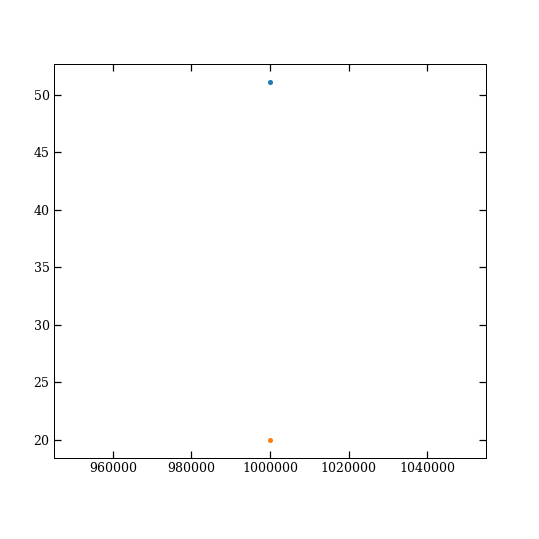

90

In [1163]:
Percentage = np.nansum(Result, axis= 1)/Result.shape[1]
MaskedP = np.nansum(Masked, axis= 1)/Masked.shape[1]
plt.figure()
plt.plot(D[0]+1,Percentage*100,'.')
plt.plot(D[0]+1,MaskedP*100,'.');
np.nansum(Fakes)

<IPython.core.display.Javascript object>


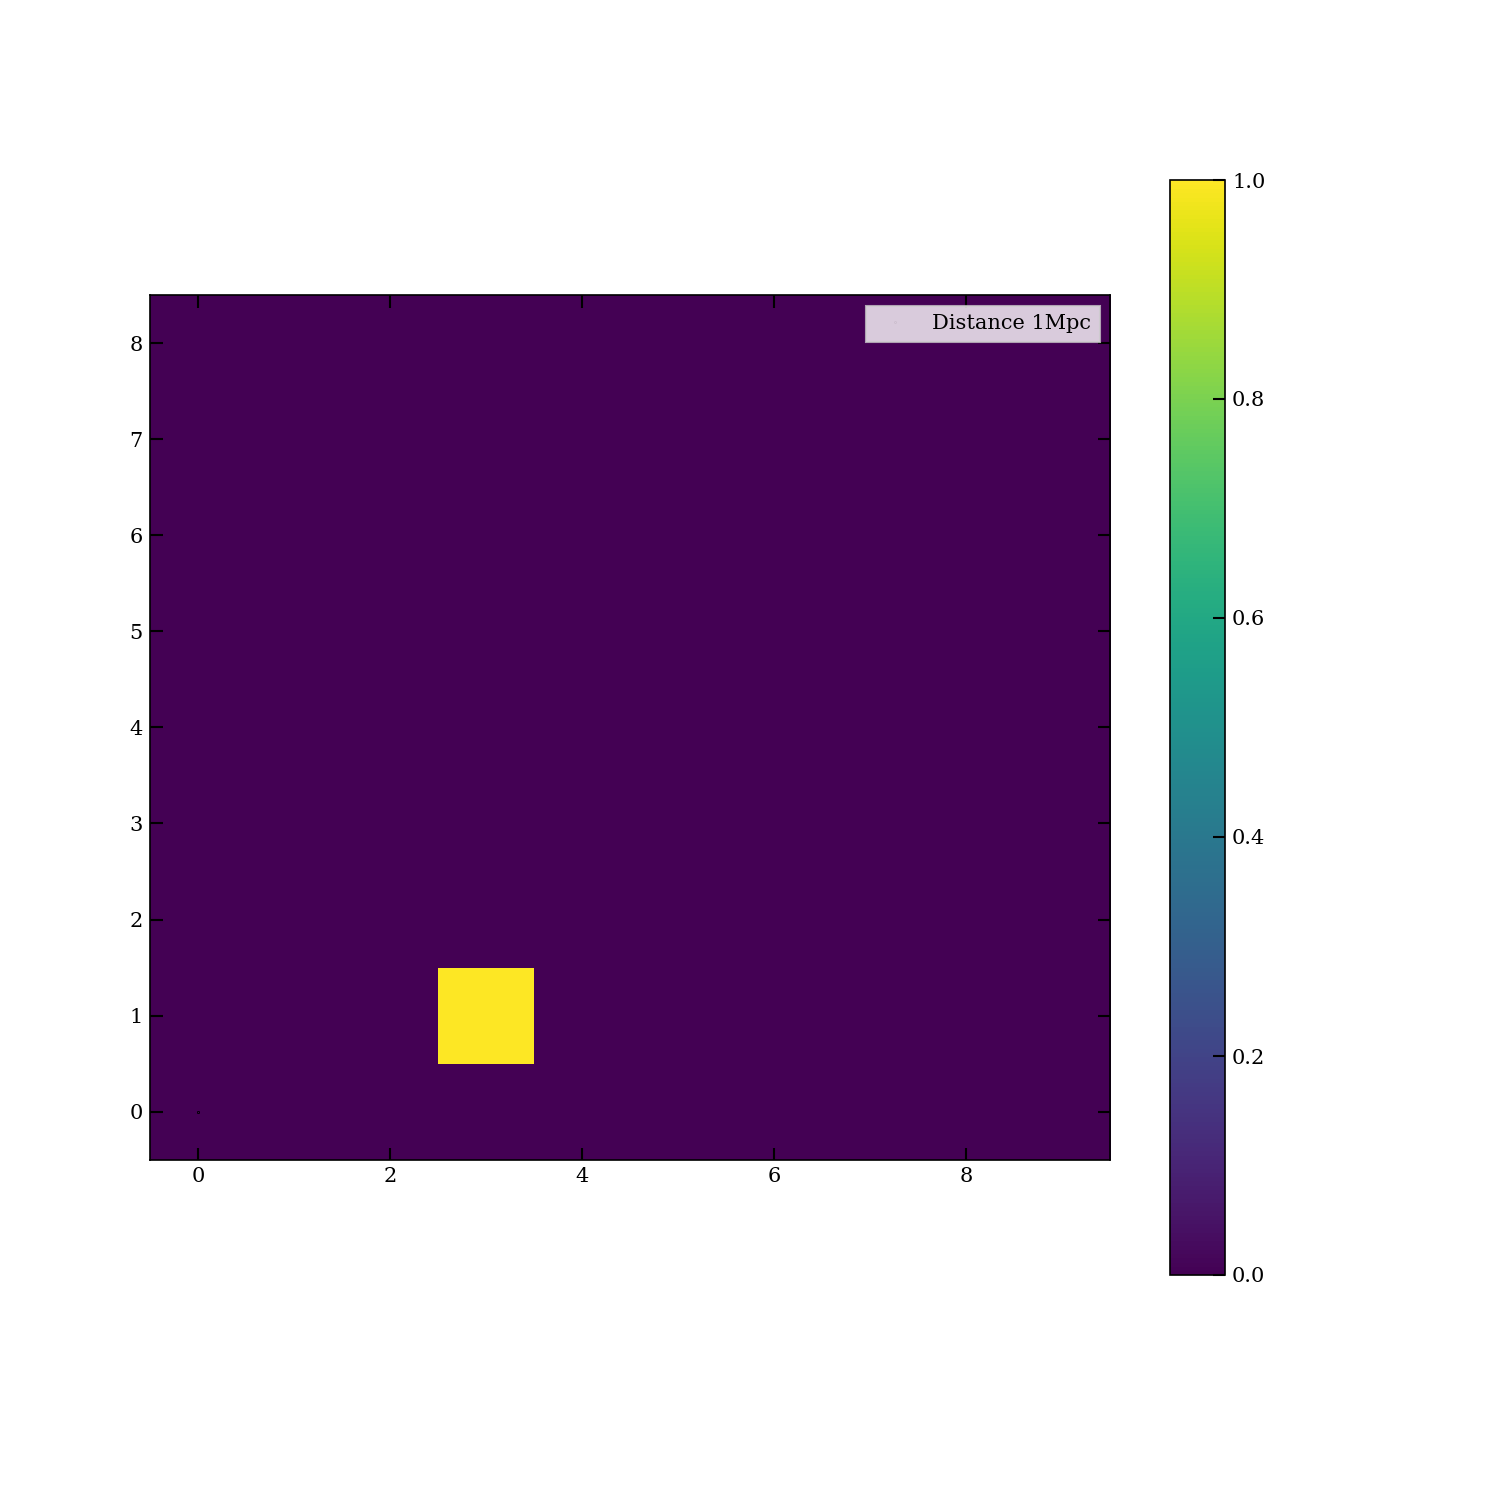

In [1071]:
import matplotlib.animation as animation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib notebook

fig = plt.figure(figsize=(10,10))

im = plt.imshow(Detections[0,:,:], origin='lower', vmin = 0, vmax = 1, animated=True)
im2 = plt.plot(0,0,'k.',label = 'Distance %i' % (D[0]/1e6) + 'Mpc',markersize = .05,animated=True)
plt.legend()
i = 0
def updatefig(*args):
    global i
    if i<Detections.shape[0]+1:
        i+=1
        
    im.set_array(Detections[i])
    im2 = plt.plot(0,0,'k.',label = 'Distance %i' % (D[i]/1e6) + 'Mpc',markersize = .05)
    #im2.set_label('Distance %i' % (D[i]/1e6) + 'Mpc')
    return im, im2,

ani = animation.FuncAnimation(fig, updatefig, interval=60, blit=True)
plt.colorbar();
#ani.save(save+pixelfile.split('/')[-1].split('-')[0]+'_'+'.gif',writer='imagemagick');
#plt.figure()
#plt.imshow(eventmask[j],origin='lower')


<IPython.core.display.Javascript object>


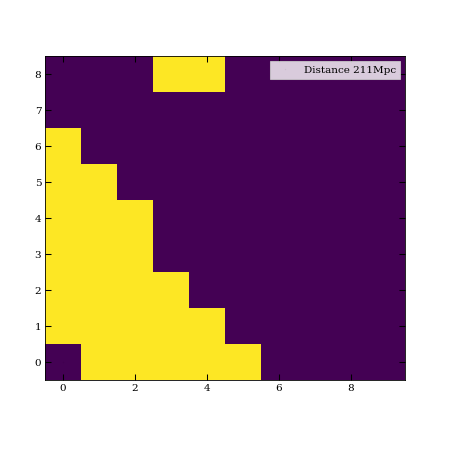

In [1077]:
plt.figure()
plt.imshow(Detections[10],origin = 'lower')
plt.plot(0,0,'k.',label = 'Distance '+str(int(D[21]/1e6))+'Mpc',markersize = .05)
plt.legend()

<IPython.core.display.Javascript object>


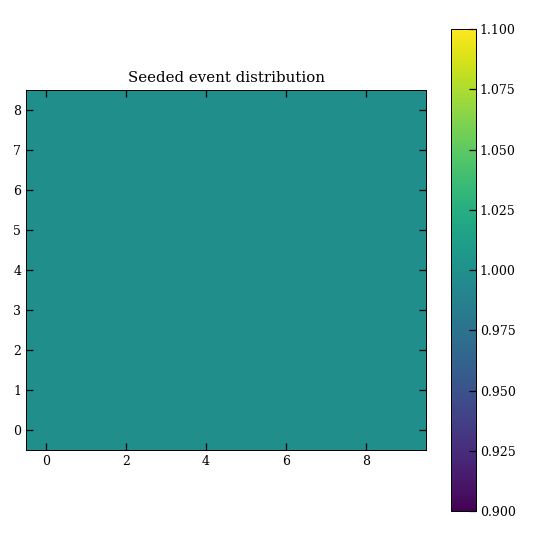

1.0


<IPython.core.display.Javascript object>


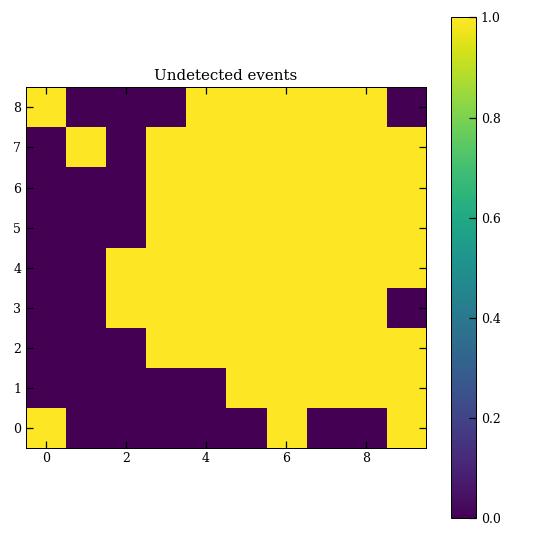

In [1171]:
Sampled = np.zeros((data.shape[1],data.shape[2]))
Failed = np.zeros((data.shape[1],data.shape[2]))
Failtime = np.zeros(data.shape[0])

for i in range(len(positions)):
    Sampled[positions[i][0],positions[i][1]] += 1
    if Result[0,i] != 1:
        Failed[positions[i][0],positions[i][1]] += 1
        #Failtime[starts[i]] += 1
    
plt.figure()
plt.title('Seeded event distribution')
plt.imshow(Sampled,origin = 'lower')
plt.tight_layout()
plt.colorbar();
print(np.mean(Sampled))

plt.figure()
plt.title('Undetected events')
plt.imshow(Failed,origin = 'lower')
plt.colorbar()
plt.tight_layout();


<IPython.core.display.Javascript object>


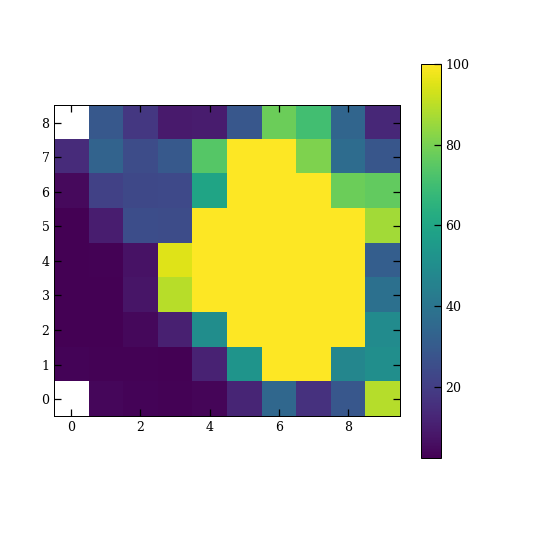

<IPython.core.display.Javascript object>


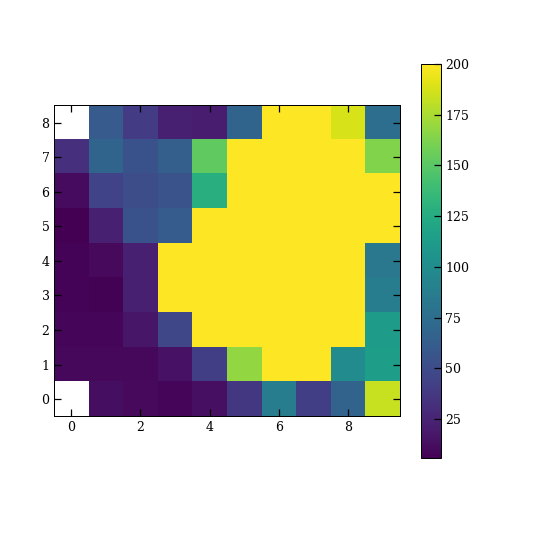

In [988]:
std = np.nanstd(data,axis= 0)
plt.figure()
plt.imshow(std,origin = 'lower',vmax=100)
plt.colorbar()
median = np.nanmedian(data,axis= 0)
plt.figure()
plt.imshow(2*std+median,origin = 'lower',vmax=200)
plt.colorbar()

In [ ]:
plt.figure()
testlight = np.nansum(data[:,4:6,1:3],axis= (1,2))
plt.plot(testlight,'.')

In [ ]:
plt.figure()
plt.plot(np.arange(0,data.shape[0],1),Failtime)

In [ ]:
starts[50:60]

In [ ]:
D[5]

In [43]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2TranPix.py'

from random import randint
pixfile = '/Volumes/TOSHIBA EXt/K2/c6/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz'
hdu = fits.open(pixfile)
dat = hdu[1].data
data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
time = dat["TIME"] + 2454833.0
Qual = hdu[1].data.field('QUALITY')

Minframe= FindMinFrame(data)

D = 51000000.0
save = save + str(D)
Kilonova, Kilotime = K2Kilonova(3,D)
Kilonova = Kilonova[0,Kilotime > 0]
if Kilonova.shape[0] > data[starts[51]:].shape[0]:
    Kilonova = Kilonova[:data[starts[51]:].shape[0]]
else:
    temp = np.zeros(data[starts[51]:].shape[0])
    temp[:Kilonova.shape[0]] = Kilonova
    Kilonova = temp
testdata[starts[51]:,6,5] = data[starts[51]:,6,5] + Kilonova
thing = K2tranPix(testdata,time,Qual,wcs,pixfile,save)

IndexError: list index out of range

## Testing parabola fit

In [ ]:
lc = np.nansum(data[:,0:8,1:4],axis=(1,2))
eventtime = np.where((time >69.3+time[0]) & (time < 79.2+time[0]))[0]

In [ ]:
middle = np.where(np.nanmax(lc[eventtime[0]-1:eventtime[-1]+1]) == lc)[0][0]
x = np.arange(middle-2,middle+2+1,1)
x2 = np.arange(0,len(x),1)
y = lc[x]
p1, residual, _, _, _ = np.polyfit(x,y,2, full = True)
p2 = np.poly1d(p1)
maxpoly = np.where(np.nanmax(p2(x)) == p2(x))[0][0]


In [ ]:
np.save('testdata.npy',testdata)

In [ ]:
np.where(time>=42+time[0])[0][0]

In [ ]:
p2 = np.poly1d(p1)
plt.figure()
plt.plot(x,lc[x],'.')
plt.plot(x,p2(x),'.')
plt.ylabel('Counts')
plt.xlabel('Time')
plt.title('Residual = ' + str(residual))

## other stuff


In [ ]:
lc = np.nansum(data*event,axis=(1,2))
eventtime = np.where((time >70.6+time[0]) & (time < 71.4+time[0]))[0]
middle = np.where(np.nanmax(lc[eventtime[0]-1:eventtime[-1]+1]) == lc)[0][0]
x = np.arange(middle-3,middle+3+1,1)
x2 = np.arange(0,len(x),1)
y = lc[x]
p1, residual, _, _, _ = np.polyfit(x,y,2, full = True)

In [912]:

# coding: utf-8

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from scipy.signal import convolve2d
from scipy.signal import deconvolve
from scipy.ndimage.filters import convolve

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from glob import glob
import os

from tqdm import tnrange, tqdm_notebook
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from scipy.ndimage.filters import convolve

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from glob import glob
import os

from tqdm import tnrange, tqdm_notebook
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)



def DriftKiller(data,thrust):
    # The right value choice here is a bit ambiguous, though it seems that typical variations are <10.
    Drift = (abs(data[thrust+1]-data[thrust-1]) < 10)*1.0 
    Drift[Drift == 0] = np.nan
    j = 0
    for i in range(len(thrust)):
        data[j:thrust[i]] = data[j:thrust[i]]*Drift[i]
        j = thrust[i]
    return data

def FindMinFrame(data):
    # Finding the reference frame    
    n_steps = 12
    std_vec = np.zeros(n_steps)
    for i in range(n_steps):
        std_vec[i] = np.nanstd(data[i:-n_steps+i:n_steps,:,:] - data[i+n_steps*80,:,:])
    Framemin = np.where(std_vec==np.nanmin(std_vec))[0][0]
    return Framemin

def ObjectMask(datacube,Framemin):
    # Make a mask of the target object, using the reference frame 
    Mask = datacube[Framemin,:,:]/(np.nanmedian(datacube[Framemin,:,:])+np.nanstd(datacube[Framemin,:,:]))
    Mask[Mask>=1] = np.nan
    Mask[Mask<1] = 1
    # Generate a second mask from remainder of the first. This grabs the fainter pixels around known sources
    Maskv2 = datacube[Framemin,:,:]*Mask/(np.nanmedian(datacube[Framemin,:,:]*Mask)+np.nanstd(datacube[Framemin,:,:]*Mask))
    Maskv2[Maskv2>=1] = np.nan
    Maskv2[Maskv2<1] = 1
    return Maskv2

def ThrustObjectMask(data,thrust):
    StartMask = np.ones((data.shape[1],data.shape[2]))
    for i in range(2):
        Start = data[thrust[:3]+1]*StartMask/(np.nanmedian(data[thrust[:3]+1]*StartMask, axis = (1,2))+np.nanstd(data[thrust[:3]+1]*StartMask, axis = (1,2)))[:,None,None]
        Start = Start >= 1
        temp = (np.nansum(Start*1, axis = 0) >=1)*1.0
        temp[temp>=1] = np.nan
        temp[temp<1] = 1
        StartMask = StartMask*temp


    EndMask = np.ones((data.shape[1],data.shape[2]))
    for i in range(2):
        End = data[thrust[-3:]+1]*EndMask/(np.nanmedian(data[thrust[-3:]+1]*EndMask, axis = (1,2))+np.nanstd(data[thrust[-3:]+1]*EndMask, axis = (1,2)))[:,None,None]
        End = End >= 1
        temp = (np.nansum(End*1, axis = 0) >=1)*1.0
        temp[temp>=1] = np.nan
        temp[temp<1] = 1
        EndMask = EndMask*temp
    
        
    Mask = np.nansum([np.ma.masked_invalid(StartMask).mask,np.ma.masked_invalid(EndMask).mask],axis=(0))*1.0
    Mask[Mask!=2] = 1
    Mask[Mask==2] = np.nan
    return Mask



def EventSplitter(events,Times,Masks,framemask):
    Events = []
    times = []
    mask = []
    for i in range(len(events)):
        # Check if there are multiple transients
        Coincident = Masks[events[i]]*framemask[events[i]]*1
        positions = np.where(Coincident == 1)
        if len(positions[0]) >1:
            for p in range(len(positions[0])):
                eventmask = np.zeros((Masks.shape[1],Masks.shape[2]))
                eventmask[positions[0][p],positions[1][p]] = 1
                eventmask = convolve(eventmask,np.ones((3,3)),mode='constant', cval=0.0)
                Similar = np.where((Masks[Times[i][0]:,:,:]*eventmask == eventmask).all(axis=(1,2)))[0]
                if len(np.where((np.diff(Similar)<5) == False)[0]) < 1:
                    SimEnd = -1
                else:
                    SimEnd = np.where((np.diff(Similar)<5) == False)[0][0] - 1
                Similar = Similar[:SimEnd]
                if len(Similar) > 1:
                    timerange = [Similar[0]+Times[i][0]-1,Similar[-1]+Times[i][0]+1]
                    if len(timerange) > 1:
                        Events.append(events[i])
                        times.append(timerange)
                        mask.append(eventmask)
        else:
            Events.append(events[i])
            times.append(Times[i])
            mask.append(Masks[events[i]])
            

    return Events, times, mask

def Asteroid_fitter(Mask,Time,Data, plot = False):
    lc = np.nansum(Data*Mask,axis=(1,2))
    middle = np.where(np.nanmax(lc[Time[0]-1:Time[-1]+1]) == lc)[0][0]
    x = np.arange(middle-2,middle+2+1,1)
    x2 = np.arange(0,len(x),1)
    y = lc[[np.arange(middle-2,middle+2+1,1)]]
    p1, residual, _, _, _ = np.polyfit(x,y,2, full = True)
    p2 = np.poly1d(p1)
    maxpoly = np.where(np.nanmax(p2(x)) == p2(x))[0][0]
    if (residual < 5000) &  (abs(middle - x[maxpoly]) < 2):
        asteroid = True
        if plot == True:
            p2 = np.poly1d(p1)
            plt.figure()
            plt.plot(x,lc[x],'.')
            plt.plot(x,p2(x),'.')
            plt.ylabel('Counts')
            plt.xlabel('Time')
            plt.title('Residual = ' + str(residual))
            
    else:
        asteroid = False
        
    return asteroid 

def Smoothmax(interval,Lightcurve,qual):
    x = np.arange(interval[0],interval[1],1.)
    x[qual[interval[0]:interval[-1]]!=0] = np.nan 
    nbins = int(len(x)/5)
    y = np.copy(Lightcurve[interval[0]:interval[-1]])
    y[qual[interval[0]:interval[-1]]!=0] = np.nan
    
    if np.nansum(x) > 0:
        n, _ = np.histogram(x, bins=nbins,range=(np.nanmin(x),np.nanmax(x)))
        sy, _ = np.histogram(x, bins=nbins, weights=y,range=(np.nanmin(x),np.nanmax(x)))
        sy2, _ = np.histogram(x, bins=nbins, weights=y*y,range=(np.nanmin(x),np.nanmax(x)))
        mean = sy / n
        std = np.sqrt(sy2/n - mean*mean)

        xrange = np.linspace(np.nanmin(x),np.nanmax(x),len(x))
        y_smooth = np.interp(xrange, (_[1:] + _[:-1])/2, mean)
        y_smooh_error = np.interp(xrange, (_[1:] + _[:-1])/2, std)

        temp = np.copy(y)
        temp[y_smooh_error>10] =np.nan

        maxpos = np.where(temp == np.nanmax(temp))[0]+interval[0]
    else:
        maxpos = 0
    return maxpos

def ThrusterElim(Events,Times,Masks,Firings,Quality,qual,Data,Real_position):
    temp = []
    temp2 = []
    temp3 = []
    asteroid = []
    asttime = []
    astmask = []
    for i in range(len(Events)):
        Range = Times[i][-1] - Times[i][0]
        if (Range > 0) & (Range/Data.shape[0] < 0.8) & (Times[i][0] > 5): 
            if (Real_position*Masks[i]).any():
                print('T1')
            begining = Firings[(Firings >= Times[i][0]-3) & (Firings <= Times[i][0])]
            if len(begining) == 0:
                begining = Quality[(Quality >= Times[i][0]-1) & (Quality <= Times[i][0])]
            end = Firings[(Firings >= Times[i][-1]) & (Firings <= Times[i][-1]+3)]
            if len(end) == 0:
                end = Quality[(Quality >= Times[i][-1]) & (Quality <= Times[i][-1]+1)]
            eventthrust = Firings[(Firings >= Times[i][0]) & (Firings <= Times[i][-1])]
            
            if (~begining.any() & ~end.any()) & (len(eventthrust) < 3):
                
                if Asteroid_fitter(Masks[i],Times[i],Data):
                    asteroid.append(Events[i])
                    asttime.append(Times[i])
                    astmask.append(Masks[i])
                else:
                    temp.append(Events[i])
                    temp2.append(Times[i])
                    temp3.append(Masks[i])
                    if (Real_position*Masks[i]).any():
                        print('TSF')
            elif len(eventthrust) >= 3:
                if (Real_position*Masks[i]).any():
                    print('TL1')
                if begining.shape[0] == 0:
                    begining = 0
                else:
                    begining = begining[0]   
                if end.shape[0] == 0:
                    end = Times[i][-1] + 10
                else:
                    end = end[0]
                LC = np.nansum(Data*Masks[i], axis = (1,2))
                maxloc = Smoothmax(Times[i],LC,qual)

                if ((maxloc > begining) & (maxloc < end)): 
                    postmean = np.nanmedian(LC[eventthrust[(qual[eventthrust+1]==0)]+1])
                    Outsidethrust = Firings[(Firings < Times[i][0]) | (Firings > Times[i][-1]+20)]
                    Outsidemean = np.nanmedian(LC[(Outsidethrust[(qual[Outsidethrust+1]==0)]+1)])
                    Outsidestd = np.nanstd(LC[(Outsidethrust[(qual[Outsidethrust+1]==0)]+1)])
                    if (Real_position*Masks[i]).any():
                        print(postmean)
                        print(Outsidemean)
                        print(Outsidestd)
                    if  postmean > Outsidemean+3*Outsidestd:
                        temp.append(Events[i])
                        temp2.append(Times[i])
                        temp3.append(Masks[i])
                        if (Real_position*Masks[i]).any():
                            print('TLF')

    events = np.array(temp)
    eventtime = np.array(temp2)
    eventmask = np.array(temp3)
    print(events)
    return events, eventtime, eventmask, asteroid, asttime, astmask


def pix2coord(x,y,mywcs):
    wx, wy = mywcs.wcs_pix2world(x, y, 0)
    return np.array([float(wx), float(wy)])

def Get_gal_lat(mywcs,datacube):
    ra, dec = mywcs.wcs_pix2world(int(datacube.shape[1]/2), int(datacube.shape[2]/2), 0)
    b = SkyCoord(ra=float(ra)*u.degree, dec=float(dec)*u.degree, frame='icrs').galactic.b.degree
    return b





data = datas[0]
time = time
Qual = Qual
mywcs = mywcs 
Position = positions[0]
Time = starts[0]
try:
    datacube = data
    if datacube.shape[1] > 1 and datacube.shape[2] > 1:
        thrusters = np.where((Qual == 1048576) | (Qual == 1089568) | (Qual == 1056768) | (Qual == 1064960) | (Qual == 1081376) | (Qual == 10240) | (Qual == 32768) )[0]
        quality = np.where(Qual != 0)[0]
        #calculate the reference frame
        Framemin = FindMinFrame(datacube)
        # Apply object mask to data
        Mask = ThrustObjectMask(datacube,thrusters)

        Maskdata = datacube*Mask
        #Maskdata[Maskdata<0] = 0 

        #Motion control
        #Conv = convolve2d(np.ma.masked_invalid(Mask).mask, np.ones((3,3)), mode="same")
        #Maskdata = Maskdata*(Conv < 2)

        # Make a mask for the object to use as a test to eliminate very bad pointings
        obj = np.ma.masked_invalid(Mask).mask
        objmed = np.nanmedian(datacube[thrusters+1]*obj,axis=(0))
        objstd = np.nanstd(datacube[thrusters+1]*obj,axis=(0))
        Maskdata[(np.nansum(datacube*obj,axis=(1,2)) < np.nansum(objmed-3*objstd)),:,:] = np.nan

        #overflow = ((convolve(Maskdata[(np.nansum(datacube*obj,axis=(1,2)) > np.nansum(objmed+2*objstd)),:,:],
                              #np.ones((1,1,2)), mode='constant', cval=0.0)) >= 1)*1.0
        #overflow[overflow == 1] = np.nan
        #overflow[overflow == 0] = 1
        #Maskdata[(np.nansum(datacube*obj,axis=(1,2)) > np.nansum(objmed+2*objstd)),:,:] = overflow
        #Maskdata[Maskdata > 170000] = np.nan
        #Stdframe = np.ones(Maskdata.shape)
        framemask = np.zeros(Maskdata.shape)

        #Index = (np.nansum(datacube*obj,axis=(1,2))>np.nansum(objmed-3*objstd)) #((np.nanstd(Maskdata,axis=(1,2)) > np.nanmedian(stddist)) & ((Maskdata.shape[1]>1) & (Maskdata.shape[2]>1))) 
        #framemask[Index] = (Maskdata[Index]/(np.nanmedian(Maskdata[Index])+2*(np.nanstd(Maskdata[Index])))) >= 1
        framemask = ((Maskdata/abs(np.nanmedian(Maskdata, axis = (0))+3*(np.nanstd(Maskdata, axis = (0))))) >= 1)
        framemask[:,np.where(Maskdata > 170000)[1],np.where(Maskdata > 170000)[2]] = 0
        #Index = ((np.nanstd(Maskdata) > np.nanmedian(stddist)+np.nanstd(stddist)) & ((Maskdata.shape[1]==1) | (Maskdata.shape[2] == 1))) 

        # Identify if there is a sequence of consecutive or near consecutive frames that meet condtition 
        #Eventmask = (convolve(framemask,np.ones((5,3,3)),mode='constant', cval=0.0) >= 3)
        Real_position = np.zeros((data.shape[1],data.shape[2]))
        Real_position[Position[0],Position[1]] = 1


        Eventmask = (convolve(framemask,np.ones((1,3,3)),mode='constant', cval=0.0))*1
        Eventmask[~np.where((convolve(Eventmask,np.ones((5,1,1)),mode='constant', cval=0.0) >= 4))[0]] = 0
        Eventmask[Qual!=0,:,:] = False
        #print(np.where(np.nansum(Real_position*Eventmask,axis=(1,2))>0)[0])

        #Eventmask = DriftKiller(Eventmask*Maskdata,thrusters) > 0
        #Eventmask[np.isnan(Eventmask)] = 0
        Index = np.where(np.nansum(Eventmask*1, axis = (1,2))>0)[0]
        events = []
        eventtime = []
        while len(Index) > 1:
            similar = Index[((Eventmask[Index[0]]*Eventmask[Index]) == Eventmask[Index[0]]).all(axis = (1,2))]
            #similar = similar[np.append(True, np.diff(similar)<5)]
            if len(np.where((np.diff(similar)<5) == False)[0]) < 1:
                simEnd = -1
            else:
                simEnd = np.where((np.diff(similar)<5) == False)[0][0] - 1

            if len(similar) > 1:
                events.append(similar[0])
                temp = [similar[0],similar[-1]]
                eventtime.append(temp)
                temp = []
            for number in similar:
                if ((Eventmask[Index[0]]*Eventmask[number]) == Eventmask[number]).all():
                    Index = np.delete(Index, np.where(Index == number)[0])
        print(events)
        events, eventtime, eventmask = EventSplitter(events,eventtime,Eventmask,framemask)     
        #eventtime = np.array(eventtime)
        events = np.array(events)
        eventmask = np.array(eventmask)
        print(np.where(np.nansum(Real_position*eventmask,axis=(1,2))>0)[0])
        if (Real_position*eventmask).any():
            print('2')
            print(events[np.where(np.nansum(Real_position*eventmask,axis=(1,2))>0)[0]])


        # Eliminate events that begin/end within 2 cadences of a thruster fire

        events, eventtime, eventmask, asteroid, asttime, astmask = ThrusterElim(events,eventtime,eventmask,thrusters,quality,Qual,Maskdata,Real_position)
        #events = np.array(events)
        #eventtime = np.array(eventtime)
        #eventmask = np.array(eventmask)


        temp = []
        temp2 = []
        temp3 = []
        for i in range(len(eventtime)):
            if len(eventtime[i])>0:
                t = np.nansum(Eventmask[eventtime[i][0]:eventtime[i][-1],:,:]*1,axis=(1,2)) > 0
                print(np.sum(t)/t.shape[0])
                if np.sum(t)/t.shape[0] > 0:
                    temp.append(eventtime[i][:])
                    temp2.append(events[i])
                    temp3.append(eventmask[i])
        eventtime = np.array(temp)
        events = np.array(temp2)
        eventmask = np.array(temp3)


        temp = []
        for i in range(len(events)):
            if len(np.where(datacube[eventtime[i,0]:eventtime[i,-1]]*eventmask[i] > 170000)[0]) == 0:
                temp.append(i)
        eventtime = eventtime[temp]
        events = events[temp]
        eventmask = eventmask[temp]

        if (Real_position*eventmask).any():
            print('wut')
            print(events[np.where(np.nansum(Real_position*eventmask,axis=(1,2))>0)[0]])

        Real_position = np.zeros((data.shape[1],data.shape[2]))
        Real_position[Position[0],Position[1]] = 1
        detection = []
        if len(events) > 0:
            Overlap = (((Real_position*eventmask) == 1).any(axis = (1, 2))) & ((time[eventtime[:,0]] - time[Time]) < 4) & (Time < eventtime[:,0])

            detection = events[Overlap]

            false_detection = len(events[~Overlap])
        else:
            false_detection = 0.

        if len(detection) > 0:
            detect = 1.
        else:
            detect = 0.
        if np.nansum(obj*Real_position) > 0:
            Masked = 1.
        else:
            Masked = 0.

    else:
        detect = -1.
        false_detection = -1.
        Masked = -1.
except (OSError):
    detect = -1.
    false_detection = -1.
    Masked = -1.



[10, 15, 78, 154, 158, 165, 226, 230, 246, 307, 382, 384, 410, 439, 468, 564, 623, 636, 667, 687, 699, 725, 753, 829, 865, 872, 892, 916, 960, 975, 992, 1019, 1039, 1060, 1071, 1102, 1140, 1141, 1193, 1201, 1215, 1241, 1313, 1315, 1335, 1380, 1428, 1462, 1512, 1540, 1577, 1625, 1649, 1650, 1663, 1676, 1710, 1720, 1749, 1756, 1771, 1901, 1910, 1912, 1958, 2147, 2178, 2185, 2300, 2390, 2411, 2424, 2443, 2466, 2475, 2551, 2603, 2647, 2728, 2730, 2772, 2776, 2778, 2840, 2868, 2871, 2933, 2996, 3017, 3080, 3148, 3209, 3211, 3247, 3271, 3303, 3317, 3327, 3425, 3439, 3460, 3475, 3487, 3639, 3651, 3724, 3752, 3809, 3823]
[106 121]
2
[3148 3752]
T1
T1
TL1
[]


ValueError: operands could not be broadcast together with shapes (9,10) (0,) 

In [913]:
starts

[3669, 65, 2440, 2495, 3686, 1253, 132, 193, 2672, 3515]

In [914]:
len(datacube)

3863

In [770]:
np.where(Real_position==1)

(array([4]), array([3]))

In [710]:

Events = events 
Times = eventtime
Masks = eventmask
Firings = thrusters
Quality = quality
qual =Qual
Data = datacube

temp = []
temp2 = []
temp3 = []
asteroid = []
asttime = []
astmask = []
for i in range(len(Events)):
    Range = Times[i][-1] - Times[i][0]
    if (Range > 0) & (Range/Data.shape[0] < 0.8) & (Times[i][0] > 5): 
        if (Real_position*Masks[i]).any():
            print('T1')
        begining = Firings[(Firings >= Times[i][0]-3) & (Firings <= Times[i][0]+1)]
        if len(begining) == 0:
            begining = Quality[(Quality >= Times[i][0]-1) & (Quality <= Times[i][0]+1)]
        end = Firings[(Firings >= Times[i][-1]-1) & (Firings <= Times[i][-1]+3)]
        if len(end) == 0:
            end = Quality[(Quality >= Times[i][-1]-1) & (Quality <= Times[i][-1]+1)]
        eventthrust = Firings[(Firings >= Times[i][0]) & (Firings <= Times[i][-1])]

        if (~begining.any() & ~end.any()) & (len(eventthrust) < 3):

            if Asteroid_fitter(Masks[i],Times[i],Data):
                asteroid.append(Events[i])
                asttime.append(Times[i])
                astmask.append(Masks[i])
            else:
                temp.append(Events[i])
                temp2.append(Times[i])
                temp3.append(Masks[i])
                if (Real_position*Masks[i]).any():
                    print('TSF')
        elif len(eventthrust) >= 3:
            if (Real_position*Masks[i]).any():
                print('TL1')
            if begining.shape[0] == 0:
                begining = 0
            else:
                begining = begining[0]   
            if end.shape[0] == 0:
                end = Times[i][-1] + 10
            else:
                end = end[0]
            LC = np.nansum(Data*Masks[i], axis = (1,2))
            maxloc = Smoothmax(Times[i],LC,qual)

            if ((maxloc > begining) & (maxloc < end)): 
                postmean = np.nanmedian(LC[eventthrust[(Qual[eventthrust+1]==0)]+1])
                Outsidethrust = Firings[(Firings < Times[i][0]) | (Firings > Times[i][-1]+20)]
                Outsidemean = np.nanmedian(LC[(Outsidethrust[(qual[Outsidethrust+1]==0)]+1)])
                Outsidestd = np.nanstd(LC[(Outsidethrust[(qual[Outsidethrust+1]==0)]+1)])
                if (Real_position*Masks[i]).any():
                    print(postmean)
                    print(Outsidemean)
                    print(Outsidestd)
                if  postmean > Outsidemean+3*Outsidestd:
                    temp.append(Events[i])
                    temp2.append(Times[i])
                    temp3.append(Masks[i])
                    if (Real_position*Masks[i]).any():
                        print('TLF')

<IPython.core.display.Javascript object>


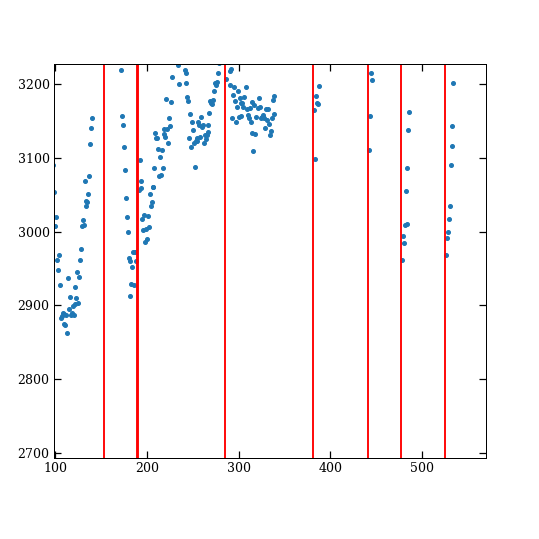

In [712]:
LC = np.nansum(Maskdata,axis=(1,2))
plt.figure()
plt.plot(LC,'.')
Lines = thrusters[thrusters+ 1 & Qual[thrusters+1]==0]
for i in Lines:
    plt.axvline(i,color = 'red')
#plt.ylim(0,10);

In [669]:
eventtime[events==1743]

array([[1743, 1875]])

In [670]:
eventtime[events==1743]
eventthrust = thrusters[(thrusters >= 1743) & (thrusters <= 1875)]
eventthrust

array([1773, 1821, 1857])

In [676]:
eventthrust[(Qual[eventthrust+1]==0)]+1 

array([1774, 1822, 1858])

In [674]:
(Qual[eventthrust+1]==0)

array([ True,  True,  True], dtype=bool)

In [665]:
np.nanmedian(LC[eventthrust+1 & (qual[eventthrust+1]==0)])

37.339152020215991

<IPython.core.display.Javascript object>


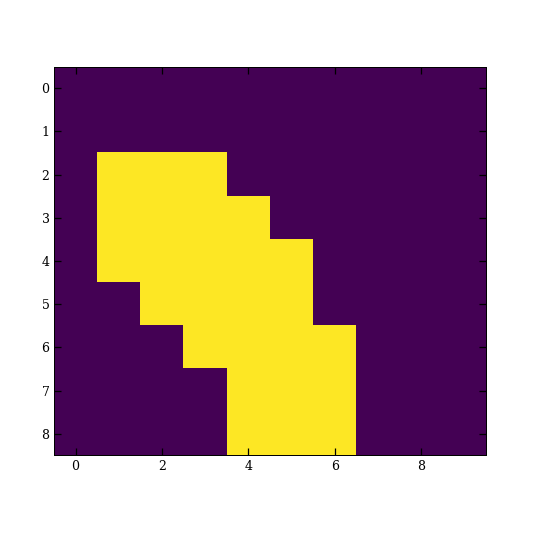

In [716]:
plt.figure()
plt.imshow(Eventmask[439],)

In [630]:
Position

[6, 2]

<IPython.core.display.Javascript object>


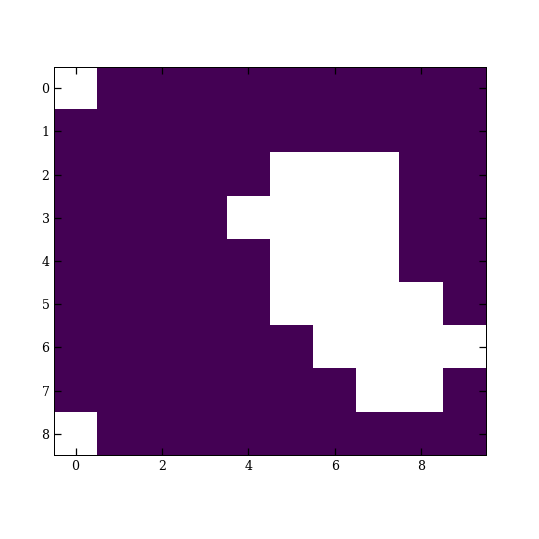

In [538]:
plt.figure()
plt.imshow(ObjectMask(datacube,Framemin))

<IPython.core.display.Javascript object>


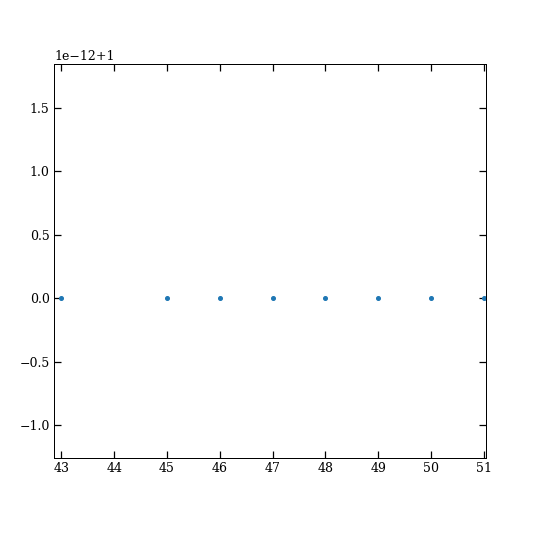

In [582]:
i =1039
LCC = np.nansum(Maskdata[(thrusters+1) & (Qual[thrusters+1]==0)],axis=(1,2))/np.nanmedian(np.nansum(Maskdata[(thrusters+1) & (Qual[thrusters+1]==0)],axis=(1,2)))
plt.figure()
plt.plot(LCC,'.')
#plt.xlim(i-50,i+100)
#plt.ylim(0,1000)

#for i in thrusters:
 #   plt.axvline(i,color = 'red')

In [575]:
np.nanstd(LCC)

1.3960196335987083

In [577]:
np.nanstd(LCC)

1078.691443922515

In [475]:

Times=eventtime
Masks=Eventmask
Events = []
times = []
mask = []
for i in range(len(events)):
    i =3
    # Check if there are multiple transients
    Coincident = Masks[events[i]]*framemask[events[i]]*1
    positions = np.where(Coincident == 1)
    print(positions)
    if len(positions[0]) >1:
        for p in range(len(positions[0])):
            eventmask = np.zeros((Masks.shape[1],Masks.shape[2]))
            eventmask[positions[0][p],positions[1][p]] = 1
            eventmask = convolve(eventmask,np.ones((3,3)),mode='constant', cval=0.0)
            Similar = np.where(Masks[Times[i][0]:,:,:]*eventmask == eventmask)[0]
            if len(Similar) > 0:
                timerange = [Similar[0]+Times[i][0]-1,Similar[-1]+Times[i][0]+1]
                if len(timerange) > 1:
                    Events.append(events[i])
                    times.append(timerange)
                    mask.append(eventmask)
    else:
        Events.append(events[i])
        times.append(Times[i])
        mask.append(Masks[events[i]])

(array([3, 4, 4, 5, 7, 8]), array([2, 3, 4, 4, 5, 5]))


In [508]:
obj

array([[ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False,  True,  True,  True, False,
        False],
       [False, False, False, False,  True,  True,  True,  True, False,
        False],
       [False, False, False, False, False,  True,  True,  True, False,
        False],
       [False, False, False, False, False,  True,  True,  True,  True,
        False],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False]], dtype=bool)

In [469]:
Eventmask = (convolve(framemask,np.ones((1,3,3)),mode='constant', cval=0.0))*1
Eventmask[~np.where((convolve(Eventmask,np.ones((5,1,1)),mode='constant', cval=0.0) >= 4))[0]] = 0


<IPython.core.display.Javascript object>


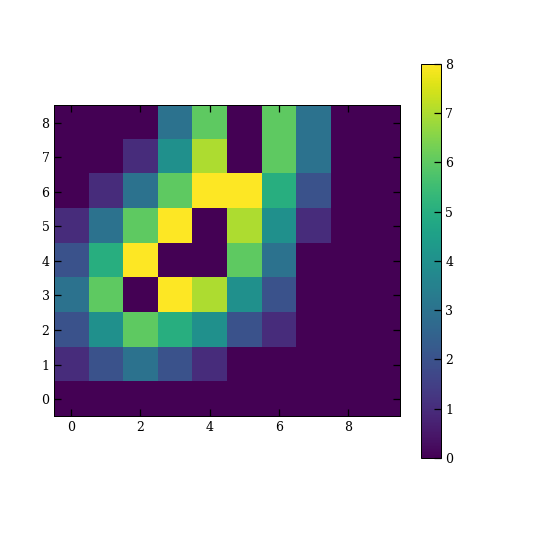

In [474]:
plt.figure()
plt.imshow(Coincident-9*framemask[events[3]],origin='lower')
plt.colorbar();

<IPython.core.display.Javascript object>


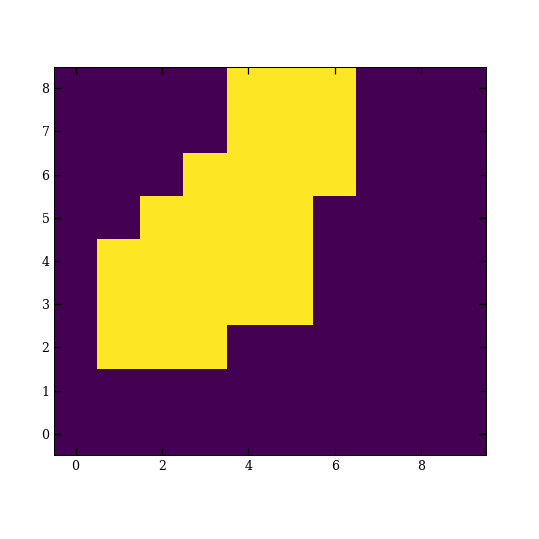

In [443]:
plt.figure()
plt.imshow((convolve(framemask[events[3]]*1,np.ones((3,3)),mode='constant', cval=0.0))*1>0,origin='lower')

<IPython.core.display.Javascript object>


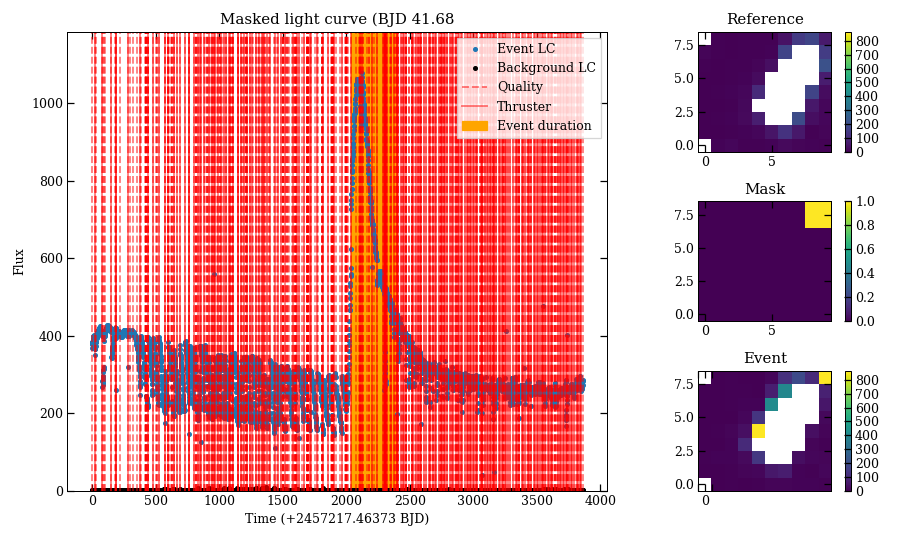

In [905]:
plt.close()
counter = 0
for i in range(len(events)):
    # Check if there are multiple transients
    #Find Coords of transient
    position = np.where(eventmask[i])
    middle = int(np.ceil(np.nansum(eventmask[i])/2))
    

    # Generate a light curve from the transient masks
    LC = np.nansum(Maskdata*eventmask[i], axis = (1,2))
    BG = Maskdata*~Eventmask[events[i]]
    BG[BG <= 0] =np.nan
    BGLC = np.nanmedian(BG, axis = (1,2))

    maxcolor = np.nanmax(Maskdata[eventtime[i][0]:eventtime[i][-1]]*eventmask[i])

    fig = plt.figure(figsize=(10,6))
    # set up subplot grid
    gridspec.GridSpec(3,3)

    # large subplot
    plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
    plt.title('Masked light curve (BJD '+str(round(time[eventtime[i][0]]-time[0],2)))
    plt.xlabel('Time (+'+str(time[0])+' BJD)')
    plt.ylabel('Flux')
    plt.plot(LC,'.', label = 'Event LC')
    plt.plot(BGLC,'k.', label = 'Background LC')
    plt.axvspan(eventtime[i][0],eventtime[i][-1], color = 'orange', label = 'Event duration')
    plt.axvline(quality[0],color = 'red', linestyle='dashed',label = 'Quality', alpha = 0.5)
    for j in range(quality.shape[0]-1):
        j = j+1 
        plt.axvline(quality[j], linestyle='dashed', color = 'red', alpha = 0.5)
    # plot Thurster firings 
    plt.axvline(thrusters[0],color = 'red',label = 'Thruster', alpha = 0.5)
    for j in range(thrusters.shape[0]-1):
        j = j+1 
        plt.axvline(thrusters[j],color = 'red', alpha = 0.5)
    xmin = eventtime[i][0]#-(eventtime[i][-1]-eventtime[i][0])/10
    xmax = eventtime[i][-1]#+(eventtime[i][-1]-eventtime[i][0])/10
    if xmin < 0:
        xmin = 0
    if xmax > time[-1] - time[0]:
        xmax = time[-1] - time[0]
    #plt.xlim(xmin,xmax) # originally 48 for some reason
    plt.ylim(0,np.nanmax(LC[eventtime[i][0]:eventtime[i][-1]])+0.1*np.nanmax(LC[eventtime[i][0]:eventtime[i][-1]]))
    plt.legend(loc = 1)
    # small subplot 1 Reference image plot
    plt.subplot2grid((3,3), (0,2))
    plt.title('Reference')
    plt.imshow(Maskdata[Framemin,:,:], origin='lower',vmin=0,vmax = maxcolor)
    plt.colorbar()
    # small subplot 2 Event mask
    plt.subplot2grid((3,3), (1,2))
    plt.title('Mask')
    plt.imshow(eventmask[i], origin='lower')
    plt.colorbar()
    # small subplot 3 Image of event
    plt.subplot2grid((3,3), (2,2))
    plt.title('Event')
    plt.imshow(Maskdata[np.where(Maskdata*eventmask[i]==np.nanmax(Maskdata[eventtime[i][0]:eventtime[i][-1]]*eventmask[i]))[0][0],:,:], origin='lower',vmin=0,vmax = maxcolor)
    plt.colorbar()
    if eventmask.shape[0] == 1 or eventmask.shape[1] == 1:
        plt.xticks([-0.5,0,0.5],['',0,''])
    # fit subplots and save fig
    fig.tight_layout()
    #fig.set_size_inches(w=11,h=7)
    #plt.savefig(save+pixelfile.split('/')[-1].split('-')[0]+'_'+str(counter)+'.pdf', bbox_inches = 'tight');


In [263]:
i = 27
begining = thrusters[(thrusters >= eventtime[i][0]-3) & (thrusters <= eventtime[i][0]+3)]
if len(begining) == 0:
    begining = Qual[(Qual >= eventtime[i][0]-1) & (Qual <= eventtime[i][0]+1)]
end = thrusters[(thrusters >= eventtime[i][-1]-3) & (thrusters <= eventtime[i][-1]+3)]
if len(end) == 0:
    end = Qual[(Qual >= eventtime[i][-1]-1) & (Qual <= eventtime[i][-1]+1)]
eventthrust = thrusters[(thrusters >= eventtime[i][0]) & (thrusters <= eventtime[i][-1])]

LC = np.nansum(Maskdata*eventmask[i], axis = (1,2))
maxloc = Smoothmax(eventtime[i],LC,Qual)

if ((maxloc > begining+1) & (maxloc < end-1)): 
    if (Real_position*Masks[i]).any():
        print('TL2')
    premean = np.nanmean(LC[eventthrust-1]) 
    poststd = np.nanstd(LC[eventthrust+1])
    postmean = np.nanmedian(LC[eventthrust+1])
    Outsidethrust = Firings[(thrusters < eventtime[i][0]) | (thrusters > eventtime[i][-1]+20)]
    Outsidemean = np.nanmedian(LC[Outsidethrust+1])
    Outsidestd = np.nanstd(LC[Outsidethrust+1])
    if (Real_position*Masks[i]).any():
        print(postmean)
        print(Outsidemean)
        print(Outsidestd)
    if  postmean > Outsidemean+2*Outsidestd:
        print('thing')

ValueError: `bins` should be a positive integer.

<IPython.core.display.Javascript object>


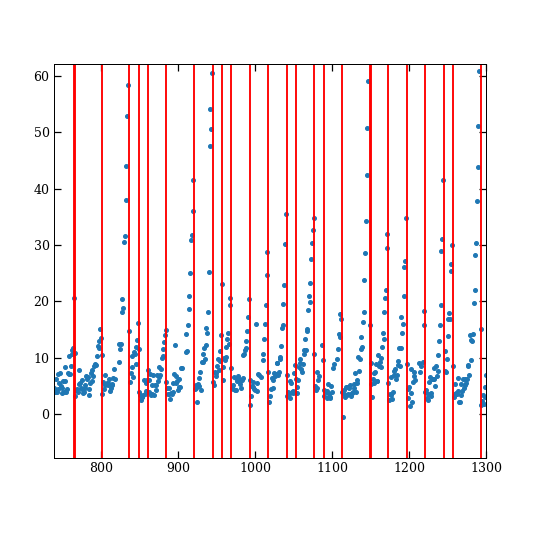

In [731]:
LCC = Maskdata[:,7,4]#np.nansum(Maskdata*eventmask[3],axis=(1,2))
plt.figure()
plt.plot(LCC,'.')
for i in thrusters:
    plt.axvline(i,color = 'red')

<IPython.core.display.Javascript object>


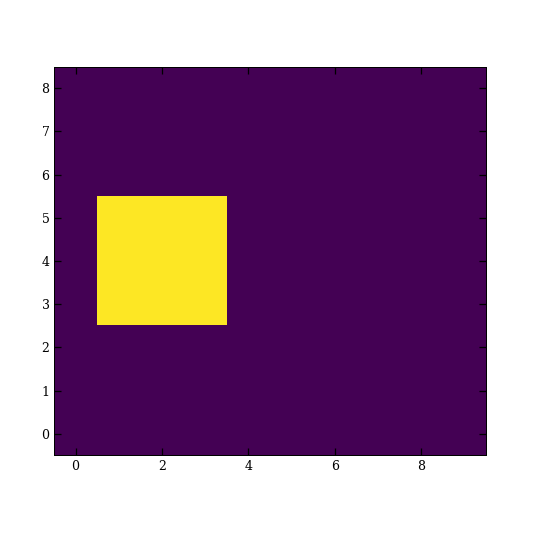

In [294]:
plt.figure()
plt.imshow(Eventmask[1108],origin='lower')

In [295]:
np.where(np.nansum((Eventmask[1108]*Eventmask)*1.,axis=(1,2)) == np.nansum(Eventmask[1108]*1))

(array([1039, 1040, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050,
        1051, 1052, 1054, 1055, 1056, 1058, 1059, 1060, 1061, 1062, 1063,
        1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
        1075, 1076, 1078, 1079, 1080, 1081, 1082, 1088, 1090, 1091, 1092,
        1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1108, 1110,
        1111, 1112, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
        1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133,
        1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144,
        1145, 1146, 1147, 1148, 1151, 1152, 1153, 1154, 1155, 1156, 1157,
        1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168,
        1169, 1170, 1171, 1172, 1174, 1176, 1177, 1178, 1179, 1180, 1181,
        1182, 1183, 1185, 1186, 1187, 1188, 1190, 1191, 1192, 1193, 1194,
        1195]),)

<IPython.core.display.Javascript object>


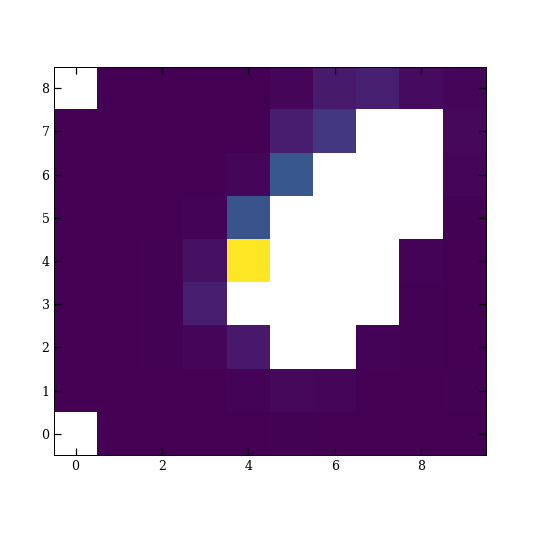

In [727]:
plt.figure()
plt.imshow(Maskdata[1108],origin='lower')

<IPython.core.display.Javascript object>


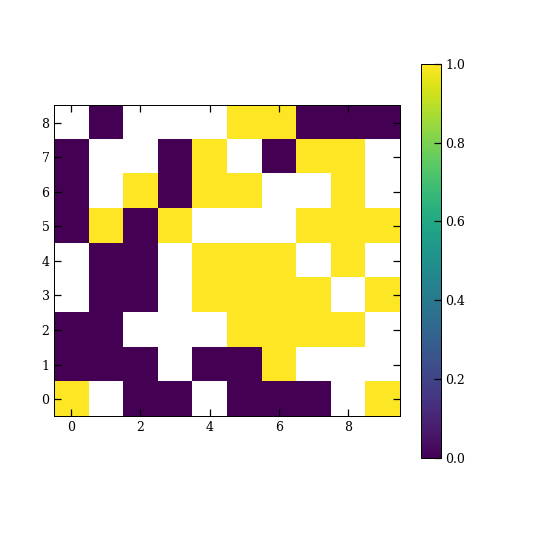

<IPython.core.display.Javascript object>


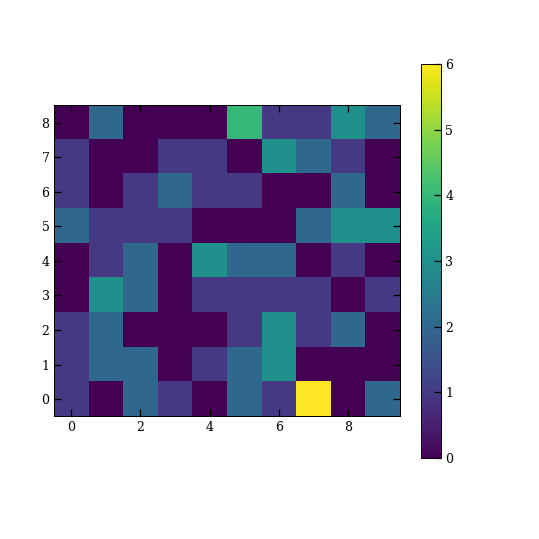

<IPython.core.display.Javascript object>


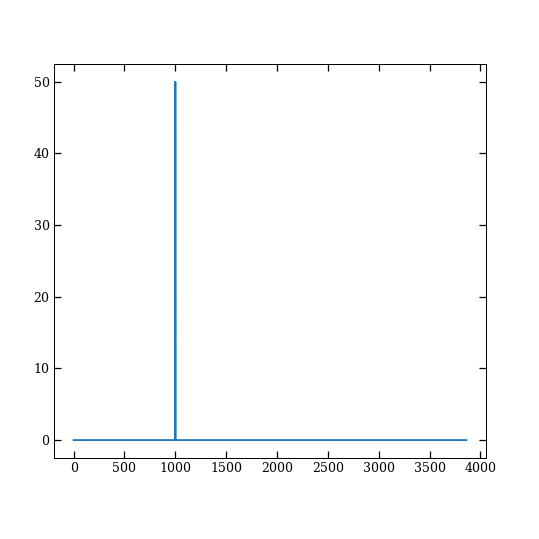

In [877]:
Fails = np.zeros((data.shape[1],data.shape[2]))
Seed = np.zeros((data.shape[1],data.shape[2]))
Failtime = np.zeros(data.shape[0])
for i in range(len(Result[0])):
    Seed[positions[i][0],positions[i][1]] +=1
    if Result[0,i] == 0:
        Fails[positions[i][0],positions[i][1]] +=1
        Failtime[starts[i]] += 1
        
plt.figure()
plt.imshow(Fails/Seed,origin='lower')
plt.colorbar()

plt.figure()
plt.imshow(Seed,origin='lower')
plt.colorbar()


plt.figure()
plt.plot(Failtime)

In [166]:
len(positions)

100

In [161]:
Result[0,1]

1.0

In [1082]:
x = [np.arange(0,datacube.shape[1],2),np.arange(1,datacube.shape[1],2)]
y = [np.arange(0,datacube.shape[2],2),np.arange(1,datacube.shape[2],2)]

In [1083]:
x

[array([0, 2, 4, 6, 8]), array([1, 3, 5, 7])]

In [1084]:
y

[array([0, 2, 4, 6, 8]), array([1, 3, 5, 7, 9])]

In [1085]:
data.shape

(3863, 9, 10)

In [1088]:
np.meshgrid(x[0],y[0],indexing='xy')

[array([[0, 2, 4, 6, 8],
        [0, 2, 4, 6, 8],
        [0, 2, 4, 6, 8],
        [0, 2, 4, 6, 8],
        [0, 2, 4, 6, 8]]), array([[0, 0, 0, 0, 0],
        [2, 2, 2, 2, 2],
        [4, 4, 4, 4, 4],
        [6, 6, 6, 6, 6],
        [8, 8, 8, 8, 8]])]

<IPython.core.display.Javascript object>


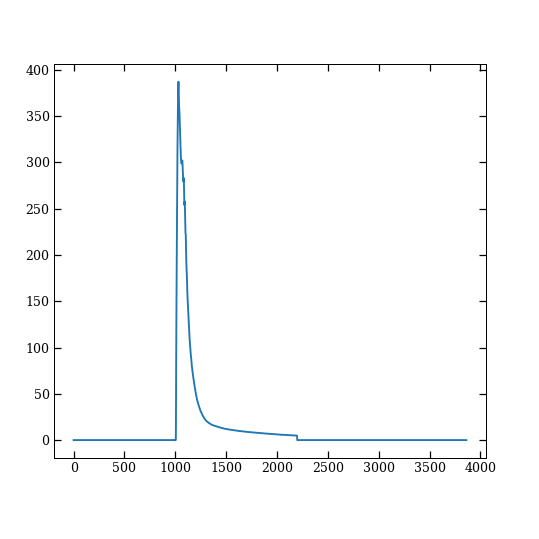

In [1161]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/KasenKilonovaSeed.ipynb'
#K2Kilonova(6,10,time,0)
plt.figure()
plt.plot(K2Kilonova(-1,19,time,1000));

In [ ]:
a.